In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
from transformers import pipeline

# Load the fine-tuned model and tokenizer
classifier = pipeline("text-classification", model="/content/drive/MyDrive/fine_tuned_model", tokenizer="/content/drive/MyDrive/fine_tuned_model")



In [ ]:
# Define label-to-category mapping (adjust according to your dataset)
label_to_category = {
    0: "entertainment",
    1: "food",
    2: "clothing",
    3: "education",
    4: "health"
}


category_to_label = {v: k for k, v in label_to_category.items()}


In [ ]:

test_sentences = [
    "I paid 50 dollars for a math class.",
    "I bought a subscription for an online journal costing 25 dollars.",
    "I watched a soccer match ticket for 60 dollars.",
    "I purchased a handbag for 80 dollars.",
    "I consulted a doctor for 70 dollars.",
    "I went to a therapy session costing 100 dollars.",
    "I ordered a pasta dish for 20 dollars.",
    "I spent 30 dollars on a new tie.",
    "I signed up for a gym membership costing 200 dollars.",
    "I bought a concert ticket for 150 dollars."
]

true_labels = [
    "education",
    "education",
    "entertainment",
    "clothing",
    "health",
    "health",
    "food",
    "clothing",
    "health",
    "entertainment"
]


In [ ]:

true_numeric_labels = [category_to_label[label] for label in true_labels]

# Predict categories for test sentences
predicted_numeric_labels = []
for sentence in test_sentences:
    result = classifier(sentence)
    label = int(result[0]["label"].split("_")[1])
    predicted_numeric_labels.append(label)

In [ ]:
# Calculate performance metrics
accuracy = accuracy_score(true_numeric_labels, predicted_numeric_labels)
precision = precision_score(true_numeric_labels, predicted_numeric_labels, average="macro")
recall = recall_score(true_numeric_labels, predicted_numeric_labels, average="macro")
f1 = f1_score(true_numeric_labels, predicted_numeric_labels, average="macro")


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


print("\nClassification Report:")
print(classification_report(true_numeric_labels, predicted_numeric_labels, target_names=label_to_category.values()))


Accuracy: 0.90
Precision: 0.93
Recall: 0.93
F1-Score: 0.92

Classification Report:
               precision    recall  f1-score   support

entertainment       1.00      1.00      1.00         2
         food       1.00      1.00      1.00         1
     clothing       1.00      1.00      1.00         2
    education       0.67      1.00      0.80         2
       health       1.00      0.67      0.80         3

     accuracy                           0.90        10
    macro avg       0.93      0.93      0.92        10
 weighted avg       0.93      0.90      0.90        10



In [ ]:
import pandas as pd
import re

# Extract cost and classify sentences
classified_data = []
total_cost=0
for sentence in test_sentences:
    result = classifier(sentence)
    category = result[0]['label']
    cost_match = re.search(r"(\d+\.?\d*)", sentence)
    cost = float(cost_match.group(1)) if cost_match else 0
    classified_data.append({"Sentence": sentence, "Category": category, "Cost": cost})

# Save to Excel
df = pd.DataFrame(classified_data)
df.to_excel("classified_expense.xlsx", index=False)
print("Classified data saved to 'classified_expenses.xlsx'.")

Classified data saved to 'classified_expenses.xlsx'.


In [ ]:
df

,Sentence,Category,Cost
0,I paid 50 dollars for a math class.,LABEL_3,50.0
1,I bought a subscription for an online journal ...,LABEL_3,25.0
2,I watched a soccer match ticket for 60 dollars.,LABEL_0,60.0
3,I purchased a handbag for 80 dollars.,LABEL_2,80.0
4,I consulted a doctor for 70 dollars.,LABEL_4,70.0
5,I went to a therapy session costing 100 dollars.,LABEL_4,100.0
6,I ordered a pasta dish for 20 dollars.,LABEL_1,20.0
7,I spent 30 dollars on a new tie.,LABEL_2,30.0
8,I signed up for a gym membership costing 200 d...,LABEL_3,200.0
9,I bought a concert ticket for 150 dollars.,LABEL_0,150.0


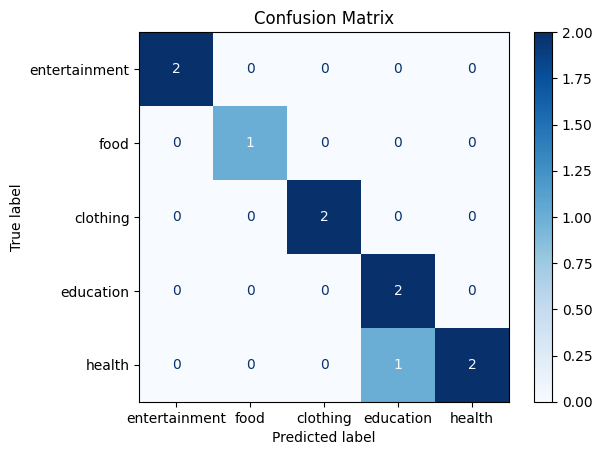

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_numeric_labels, predicted_numeric_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_to_category.values())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
result = df.groupby('Category')['Cost'].sum()

In [ ]:
result

,Cost
Category,
LABEL_0,210.0
LABEL_1,20.0
LABEL_2,110.0
LABEL_3,275.0
LABEL_4,170.0


In [ ]:
my_Labels=["entertainment", "food", "clothing","education","health"]

In [ ]:
max_value = max(result)
print(max_value)

275.0


In [ ]:
max_index = result.idxmax()
print(max_index)

LABEL_3


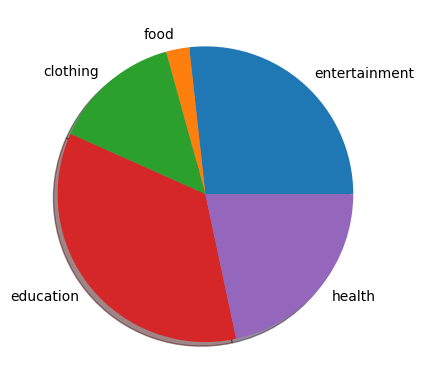

You are spending more on education


In [ ]:
if max_index == "LABEL_0":
  plt.pie(result,labels=my_Labels,shadow=True)
  plt.show()
  print("You are spending more on entertainment ",cost)
if max_index == "LABEL_1":
  plt.pie(result,labels=my_Labels,shadow=True)
  plt.show()
  print("You are spending more on food")
if max_index == "LABEL_2":
  plt.pie(result,labels=my_Labels,shadow=True)
  plt.show()
  print("You are spending more on clothing")
if max_index == "LABEL_3":
  plt.pie(result,labels=my_Labels,shadow=True)
  plt.show()
  print("You are spending more on education")
if max_index == "LABEL_4":
  plt.pie(result,labels=my_Labels,shadow=True)
  plt.show()
  print("You are spending more on health")

